In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# The following code is adopted from Pat's Rolling Rain N-Year Threshold.pynb
# Loading in hourly rain data from CSV, parsing the timestamp, and adding it as an index so it's more useful

rain_df = pd.read_csv('data/ohare_hourly_observations.csv')
rain_df['datetime'] = pd.to_datetime(rain_df['datetime'])
rain_df = rain_df.set_index(pd.DatetimeIndex(rain_df['datetime']))
chi_rain_series = rain_df['hourly_precip'].resample('1H').max()

C:\Users\Kevin Rose\Applications\Anaconda2\envs\py27\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
n_year_threshes = pd.read_csv('data/n_year_definitions.csv')
n_year_threshes = n_year_threshes.set_index('Duration')
n_year_threshes

,1-year,2-year,5-year,10-year,25-year,50-year,100-year
Duration,,,,,,,
10-day,4.12,4.95,6.04,6.89,8.18,9.38,11.14
5-day,3.25,3.93,4.91,5.70,6.93,8.04,9.96
72-hr,2.93,3.55,4.44,5.18,6.32,7.41,8.78
48-hr,2.70,3.30,4.09,4.81,5.88,6.84,8.16
24-hr,2.51,3.04,3.80,4.47,5.51,6.46,7.58
18-hr,2.30,2.79,3.50,4.11,5.06,5.95,6.97
12-hr,2.18,2.64,3.31,3.89,4.79,5.62,6.59
6-hr,1.88,2.28,2.85,3.35,4.13,4.85,5.68
3-hr,1.60,1.94,2.43,2.86,3.53,4.14,4.85


In [4]:
n_year_threshes.loc['5-min', '1-year']

0.29999999999999999

In [5]:
dur_str_to_hours = {
    '5-min':5/60.0,
    '10-min':10/60.0,
    '15-min':15/60.0,
    '30-min':0.5,
    '1-hr':1.0,
    '2-hr':2.0,
    '3-hr':3.0,
    '6-hr':6.0,
    '12-hr':12.0,
    '18-hr':18.0,
    '24-hr':24.0,
    '48-hr':48.0,
    '72-hr':72.0,
    '5-day':5*24.0,
    '10-day':10*24.0
}

def plot_thresh(duration_str, n_years, ax=None):
    '''
    TODO
    '''
    global rain_df
    global n_year_threshes
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.hold(True)
    
    thresh = n_year_threshes.loc[duration_str, str(n_years) + '-year']
    
    duration = dur_str_to_hours[duration_str]
    duration = max(duration, 1) # cannot upsample to more frequent than hourly
    # TODO: want to throw warning?
    
    rain_line = chi_rain_series.rolling(window=int(duration), min_periods=0).sum().plot(ax=ax)
    
    x_limits = ax.get_xlim()
    
    thresh_line = ax.plot(x_limits, [thresh, thresh])
    
    ax.legend(['moving cumulative rain', str(n_years) + '-year ' + duration_str + ' threshold'],
             loc='best')

<IPython.core.display.Javascript object>


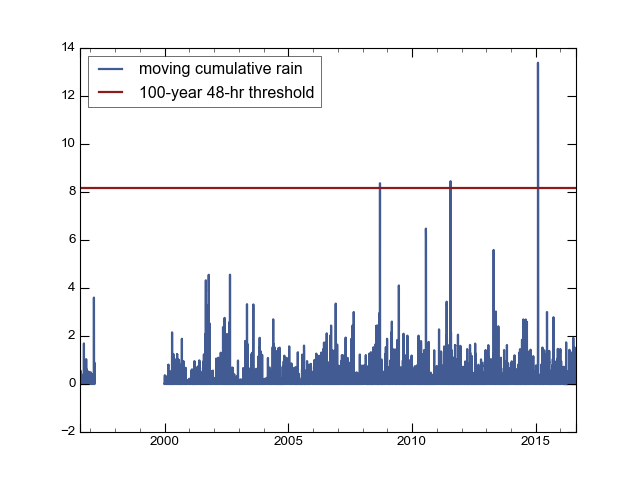

In [6]:
plot_thresh('48-hr', 100)

<IPython.core.display.Javascript object>


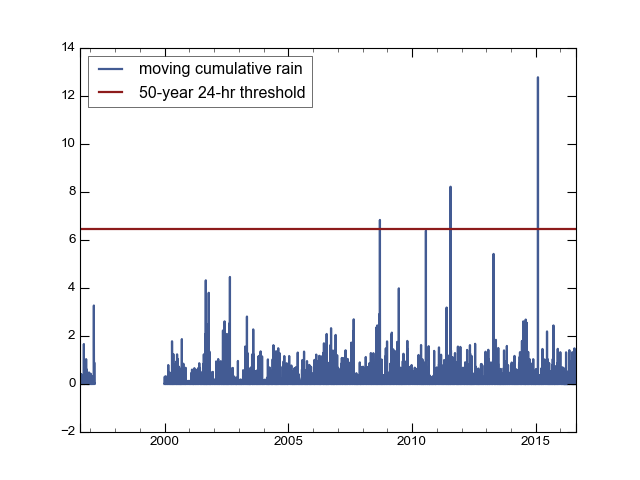

In [7]:
plot_thresh('24-hr', 50)